In [39]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

In [40]:
class LineNet(nn.Module):
    def __init__(self):
        super(LineNet, self).__init__()
        self.fc1 = nn.Linear(1, 88)
        self.a1 = nn.ReLU()
        self.fc2 = nn.Linear(88, 1)
        
        
    def forward(self, input):
        x = self.fc1(input)
        x = self.a1(x)
        x = self.fc2(x)      
        return x  

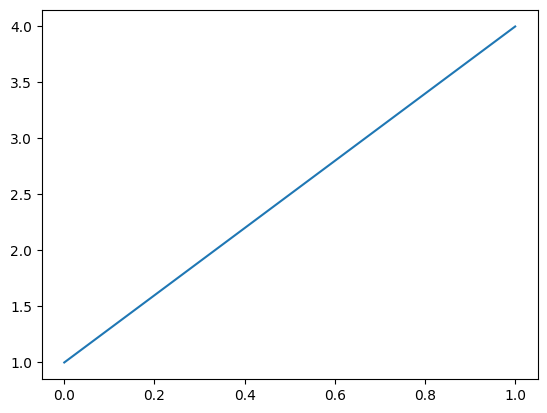

In [41]:
# defining data
m = 3
b = 1
x_train = np.linspace(0, 1, 10000)

def eq(x):
    return m*x + b
y_train = eq(x_train)
# y = mx + b
plt.plot(x_train, y_train)

x_train = torch.from_numpy(x_train.reshape(-1, 1)).float()
y_train = torch.from_numpy(y_train.reshape(-1, 1)).float()


In [42]:
# defining hyper parameters
epoch = 1000
learning_rate = 0.01

# initialize the model
model = LineNet()

# defining loss and optimizer
loss = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 


In [43]:
# the traning loop
for e in range(epoch):
    out = model(x_train)
    
    l = loss(out, y_train)
    
    optimizer.zero_grad()
    l.backward()
    optimizer.step()
    
    if (e+1) % 100 == 0:
        print(f'e [{e+1}/{1000}], Loss: {l.item():.4f}')


e [100/1000], Loss: 0.0006
e [200/1000], Loss: 0.0001
e [300/1000], Loss: 0.0000
e [400/1000], Loss: 0.0000
e [500/1000], Loss: 0.0000
e [600/1000], Loss: 0.0000
e [700/1000], Loss: 0.0000
e [800/1000], Loss: 0.0000
e [900/1000], Loss: 0.0000
e [1000/1000], Loss: 0.0000


In [44]:
y_test = np.zeros(10000)
with torch.no_grad():
    y_test = model(x_train)

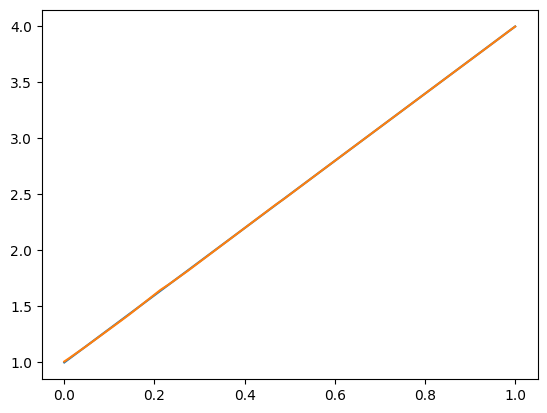

In [45]:
plt.plot(x_train, y_train)
plt.plot(x_train, y_test)